Sütun başlıkları hakkında.
Country: Ülke
Year: Yıl
Status: Gelişmiş ve gelişmekte olan
Life expectancy: Yaşta yaşam beklentisi
Adult Mortality: Her iki cinsiyette yetişkin ölüm oranları
infant deaths: Bebek ölümlerinin sayısı
Alcohol: Kişi başına göre alkol tüketimi
percentage expenditure: Kişi başı GSYİH
Hepatitis B: 1 yaşındakiler arasında hepatit B aşılama kapsamı
Measles: Kızamık - 1000 kişi başına bildirilen vaka sayısı
BMI: Ortalama vücut kitle indeksi
under-five deaths: Beş yaş altı ölümlerin sayısı
Polio: 1 yaşındakiler arasında çocuk felci aşılama kapsamı
Total expenditure: Sağlık için toplam devlet harcalamaları
Diphtheria: 1 yaşındakiler arasında difteri, tetanoz, toksoidi ve boğmaca aşılama kapsamı
HIV/AIDS: 0-4 yaş 1000 canlı doğumda ölüm
GDP: Kişi başına Gayri Safi Yurtiçi Hasıla (ABD Doları cinsinden)
Population: Ülkenin nüfusu
thinness 1-19 years: 10-19 Yaş arası çocuklar ve ergenler arasında zayıflık prevalansı
thinness 5-9 years: 5-9 Yaş arası çocuklarda zayıflık prevalansı (%)
Income composition of resources: Kaynakların gelir bileşimi açısından İnsani Gelişme Endeksi
Schooling: Eğitim yılı sayısı (yıl)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [33]:
dizi = pd.read_csv('Life_Expectancy_Data.csv', header = 0)
dizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [34]:
dizi.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
dizi.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [36]:
#Gözlem ve değişken sayılarını inceliyoruz.
dizi.shape

(2938, 22)

In [37]:
#Her bir değişkenin veri tiplerini inceliyoruz.
dizi.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [38]:
#Şimdi her kolonda kaç tane eksik değer var onları inceliyoruz.
dizi.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

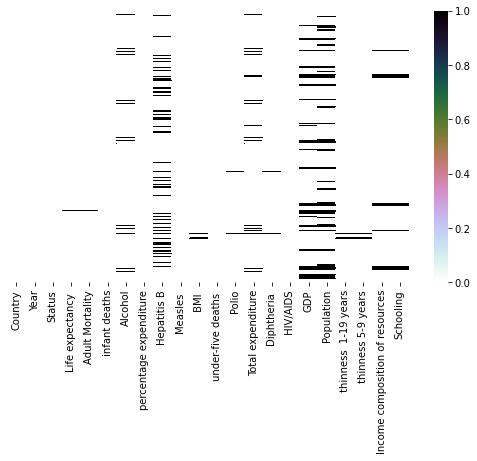

In [39]:
#Eksik değerlerin yerini görselleştiriyoruz.
fig, ax = plt.subplots(figsize = (9, 5))
sns.heatmap(dizi.isnull(), cmap = "cubehelix_r", yticklabels='')
plt.show()

In [40]:
#Her özellik için boş olan değerleri siliyoruz.
dizi.dropna(inplace=True)
dizi.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [41]:
#Meta verileri (ülke ve yıl) atıyoruz.
dizi = dizi.drop('Country', axis=1)
dizi = dizi.drop('Year', axis=1)

In [42]:
#Sütun isimlerini standart bir hale getiriyoruz.
orjinal_sutunlar = list(dizi.columns) 
yeni_sutunlar = [] 
for sutun in orjinal_sutunlar:     
    yeni_sutunlar.append(sutun.strip().replace('  ', ' ').replace(' ', '_').lower()) 

dizi.columns = yeni_sutunlar

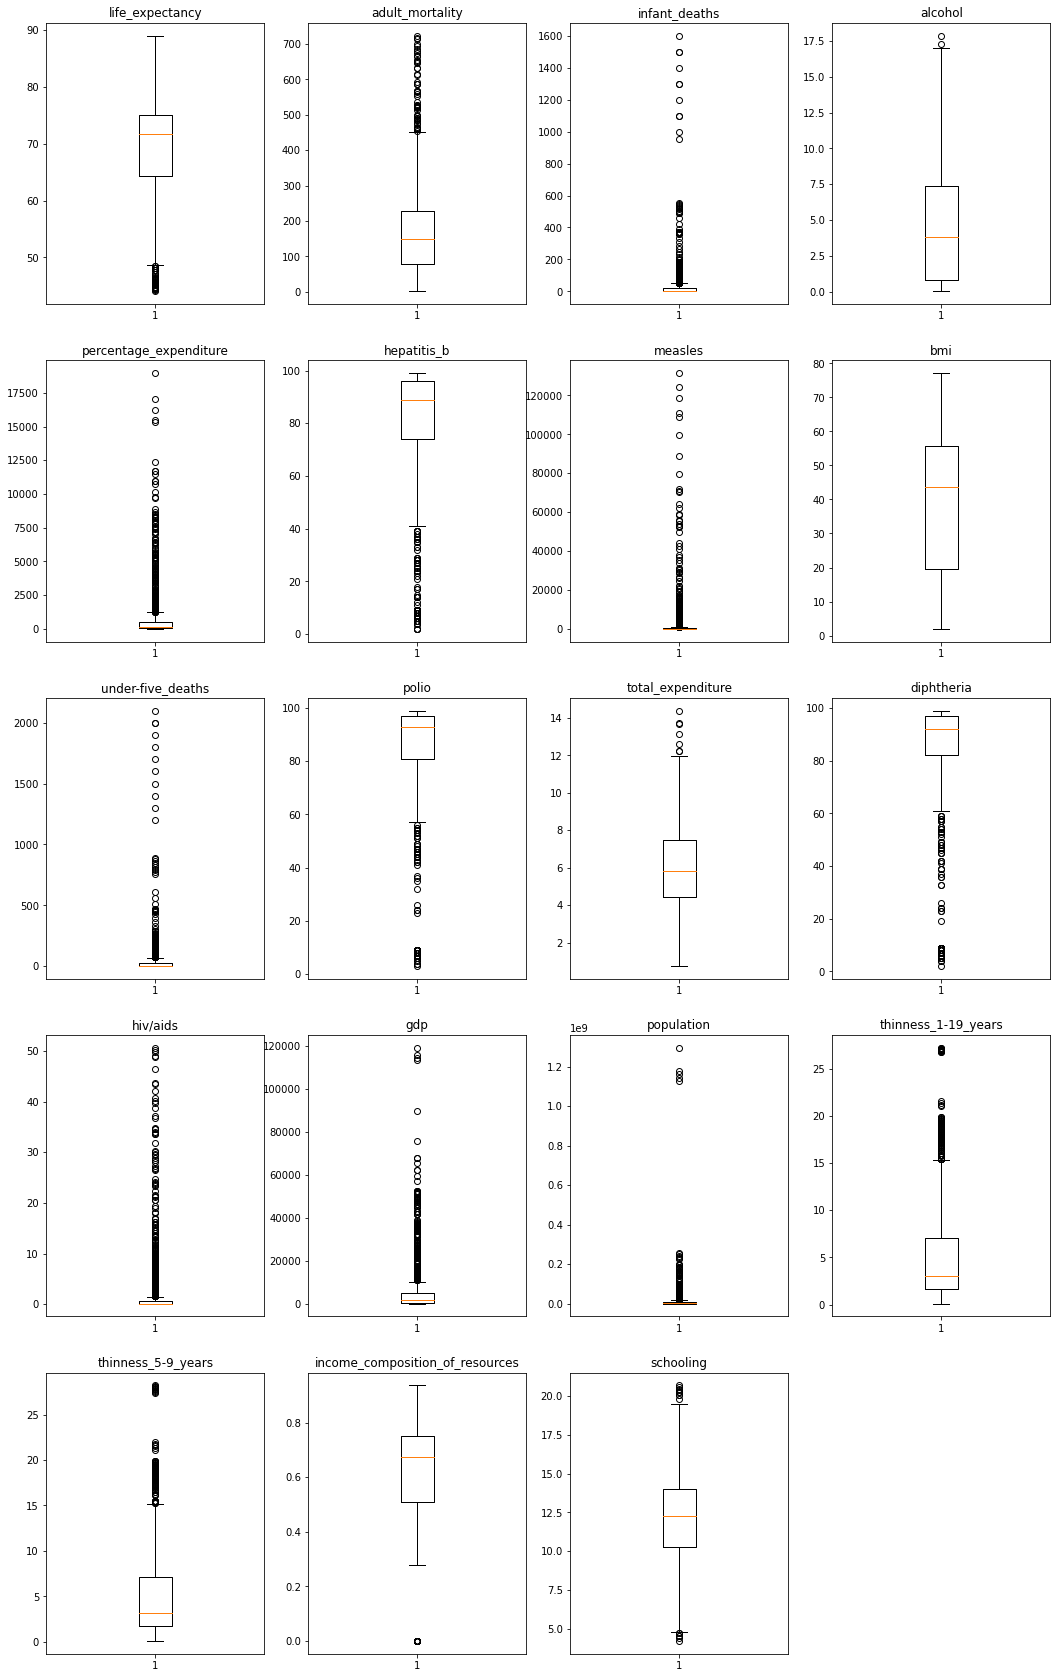

(1649, 20)

In [43]:
# Box Plot kullanarak her bir özelliğin verilerini görselleştiriyoruz.
sutun_isimleri = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,'bmi':8,
            'under-five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness_1-19_years':16,
            'thinness_5-9_years':17,'income_composition_of_resources':18,'schooling':19}

plt.figure(figsize=(18,30))

for variable,i in sutun_isimleri.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(dizi[variable],whis=1.5)
                     plt.title(variable)

plt.show()
dizi.shape

In [44]:
#Çeyrekler arası aralığı (IQR) kullanarak aykırı değerleri kaldırıyoruz.
Q1 = dizi.quantile(0.25)
Q3 = dizi.quantile(0.75)
IQR = Q3 - Q1

dizi = dizi[~((dizi < (Q1 - 1.5 * IQR)) |(dizi > (Q3 + 1.5 * IQR))).any(axis=1)]

#Durumu boolean değişkenleriyle değiştiriyoruz.
dizi["status"].replace({"Developing": 1, "Developed": 0}, inplace=True)
dizi.shape

(646, 20)

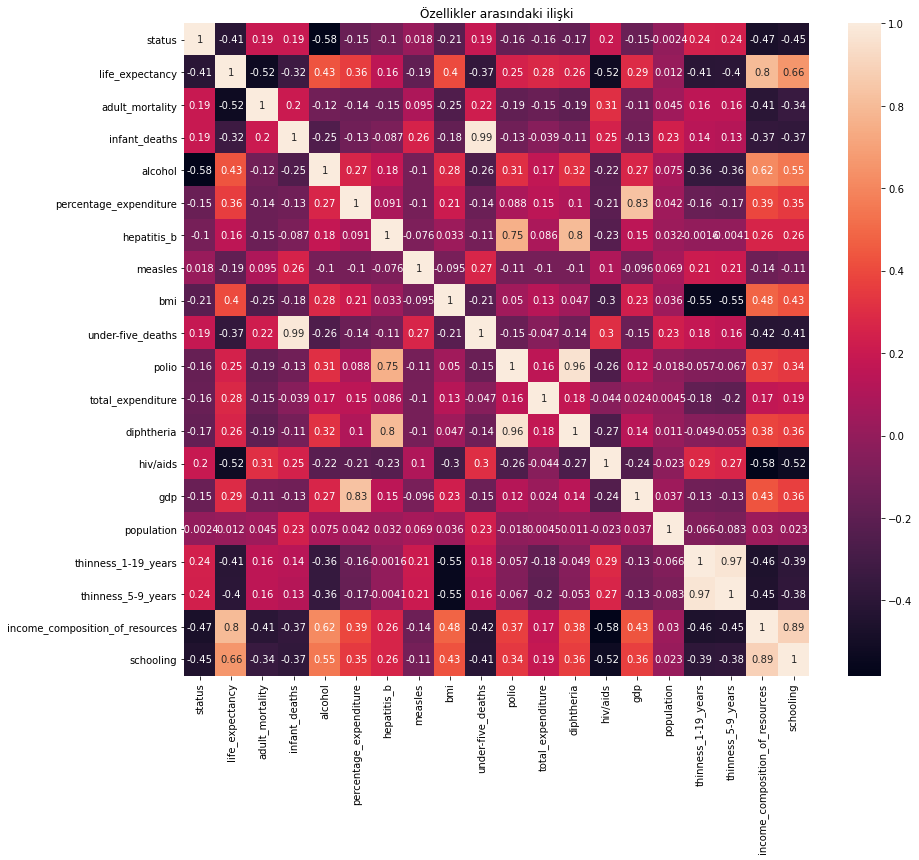

In [45]:
#Korelasyonları görselleştirmek için ısı haritasını çiziyoruz.
plt.figure(figsize = (14, 12))
sns.heatmap(dizi.corr(), annot = True)
plt.title('Özellikler arasındaki ilişki');

In [46]:
#Özellikleri etiketlerden ayırıyoruz.
X = dizi.iloc[:,1:].values
y = dizi.iloc[:,0].values

In [47]:
#Verileri normalleştiriyoruz.
X_std= StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)

#Kovaryans matrisini hesaplıyoruz.
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [48]:
# Özdeğerleri ve özvektörleri hesaplayın.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

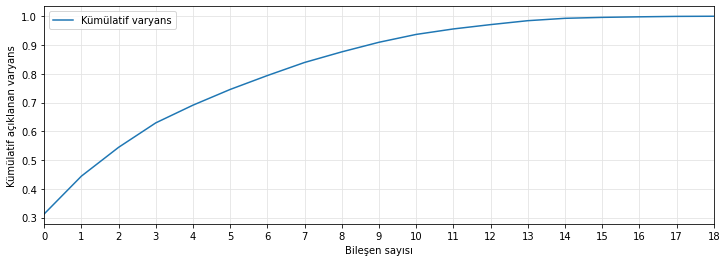

In [49]:
#Kümülatif varyansın grafiğini çiziyoruz.
pca = PCA(n_components=19).fit(X_std)
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Kümülatif varyans')
plt.xlim(0,18,1)
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif açıklanan varyans')
plt.legend(loc='best')
plt.grid(color='#E3E3E3')
plt.xticks(np.arange(0, 19, 1.0));

In [50]:
#Hedef değişkenler ile ilgili özelliklerin değerlerini alıyoruz.
ozellikler = dizi['income_composition_of_resources'].values.reshape(-1,1)
etiketler = dizi['life_expectancy'].values.reshape(-1,1)

#Veriyi normalleştiriyoruz.
min_max_scaler = MinMaxScaler()
ozellikler = min_max_scaler.fit_transform(ozellikler)

#Veri setini eğitim ve test setine bölüyoruz.
ozellikler_egitim, ozellikler_test, etiketler_egitim, etiketler_test = train_test_split(ozellikler, etiketler, train_size = 0.7, test_size = 0.3)

In [51]:
linear_model = LinearRegression()
#Modeli eğitiyoruz.
linear_model.fit(ozellikler_egitim, etiketler_egitim);

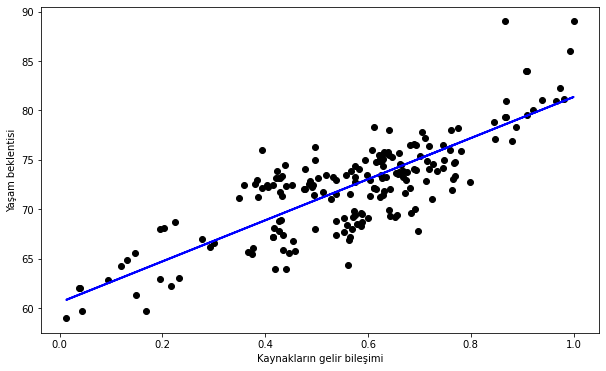

Katsayılar: 
 [[20.79175234]]
Ortalama karesel hata: 8.72


In [52]:
#Modeli test ediyoruz.
linear_model_score = linear_model.predict(ozellikler_test)

plt.figure(figsize=(10, 6))
plt.scatter(ozellikler_test, etiketler_test,  color='black')
plt.plot(ozellikler_test, linear_model_score, color='blue', linewidth=2)
plt.xlabel('Kaynakların gelir bileşimi')
plt.ylabel('Yaşam beklentisi')
plt.show()

print('Katsayılar: \n', linear_model.coef_)
print("Ortalama karesel hata: %.2f" % mean_squared_error(etiketler_test,linear_model_score))

In [53]:
ozellikler = dizi.iloc[:, 1:].values
etiketler = dizi.iloc[:,0]

min_max_scaler = MinMaxScaler()
ozellikler = min_max_scaler.fit_transform(ozellikler)

ozellikler_egitim, ozellikler_test, etiketler_egitim, etiketler_test = train_test_split(ozellikler, etiketler, train_size = 0.7, test_size = 0.3)

In [54]:
linear_model.fit(ozellikler_egitim, etiketler_egitim);

linear_model_score = linear_model.predict(ozellikler_test)

print('Katsayılar: \n', linear_model.coef_)
print("Ortalama karesel hata: %.2f" % mean_squared_error(etiketler_test, linear_model_score))

Katsayılar: 
 [-4.87120861e-01  9.73928663e-02  1.54288303e+00 -7.15398977e-01
  1.78172901e-01  1.27066303e-01 -1.24433048e-01 -1.71518000e-02
 -1.54763381e+00 -3.01159002e-02 -1.01175199e-01  9.09080642e-04
 -1.37054710e-02 -7.09315047e-02  1.31187362e-02  1.16845958e-01
 -1.41480049e-01  6.99851367e-02 -3.19930326e-01]
Ortalama karesel hata: 0.08


In [55]:
#Yaşam beklentisinin ortalamasını hesaplıyoruz.
dizi_ort = dizi['life_expectancy'].mean()
dizi_lr = dizi.copy()

# Yaşam beklentisi ortalamadan büyük ise 1, değil ise 0
dizi_lr['life_expectancy'] = (dizi_lr['life_expectancy'] > dizi_ort).astype(int)

# Separate the features from the labels.
ozellikler_lr = dizi_lr.iloc[:, 1:].values
etiketler_lr = dizi_lr.iloc[:,0]

min_max_scaler = MinMaxScaler()
ozellikler_lr = min_max_scaler.fit_transform(ozellikler_lr)

# Split the dataset in training and test set.
ozellikler_egitim_lr, ozellikler_test_lr, etiketler_egitim_lr, etiketler_test_lr = train_test_split(ozellikler_lr, etiketler_lr, train_size = 0.7, test_size = 0.3)

In [56]:
logistic_model = LogisticRegression(solver='liblinear')

#Modeli eğitiyoruz.
logistic_model.fit(ozellikler_egitim_lr, etiketler_egitim_lr);

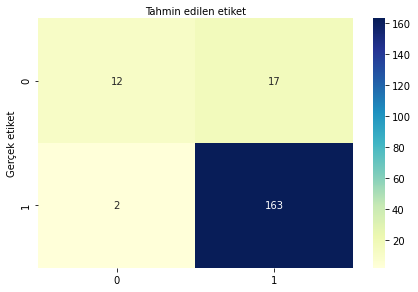

In [57]:
logistic_score = logistic_model.predict(ozellikler_test_lr)

confusion_matrix = confusion_matrix(etiketler_test_lr, logistic_score)

#Karışıklık matrisi ısı haritası
class_names=[0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),cmap='YlGnBu',annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Tahmin edilen etiket')
plt.ylabel('Gerçek etiket')
plt.show()

In [58]:
print("Eğitim verisi skor: %.2f" % logistic_model.score(ozellikler_egitim_lr, etiketler_egitim_lr))
print("Test verisi skor: %.2f" % logistic_model.score(ozellikler_test_lr, etiketler_test_lr))

Eğitim verisi skor: 0.91
Test verisi skor: 0.90


In [59]:
# 3 farklı derinlikte gerçekleştiriyoruz.
decision_tree_model1 = DecisionTreeRegressor(max_depth=1)
decision_tree_model3 = DecisionTreeRegressor(max_depth=3)
decision_tree_model5 = DecisionTreeRegressor(max_depth=5)

#Eğitim modeli
decision_tree_model1 = decision_tree_model1.fit(ozellikler_egitim, etiketler_egitim)
decision_tree_model3 = decision_tree_model3.fit(ozellikler_egitim, etiketler_egitim)
decision_tree_model5 = decision_tree_model5.fit(ozellikler_egitim, etiketler_egitim)

print("Derinliği 1 olan eğitim verisindeki puan: %.2f" % decision_tree_model1.score(ozellikler_egitim, etiketler_egitim))
print("Derinliği 1 olan test verisindeki puan: %.2f" % decision_tree_model1.score(ozellikler_test, etiketler_test))
print("Derinliği 3 olan eğitim verisindeki puan: %.2f" % decision_tree_model3.score(ozellikler_egitim, etiketler_egitim))
print("Derinliği 3 olan test verisindeki puan: %.2f" % decision_tree_model3.score(ozellikler_test, etiketler_test))
print("Derinliği 5 olan eğitim verisindeki puan: %.2f" % decision_tree_model5.score(ozellikler_egitim, etiketler_egitim))
print("Derinliği 5 olan test verisindeki puan: %.2f" % decision_tree_model5.score(ozellikler_test, etiketler_test))

Derinliği 1 olan eğitim verisindeki puan: 0.52
Derinliği 1 olan test verisindeki puan: 0.46
Derinliği 3 olan eğitim verisindeki puan: 0.87
Derinliği 3 olan test verisindeki puan: 0.56
Derinliği 5 olan eğitim verisindeki puan: 0.98
Derinliği 5 olan test verisindeki puan: 0.35


In [60]:
random_forest_model = RandomForestRegressor(n_estimators=100,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

random_forest_model.fit(ozellikler_egitim, etiketler_egitim);

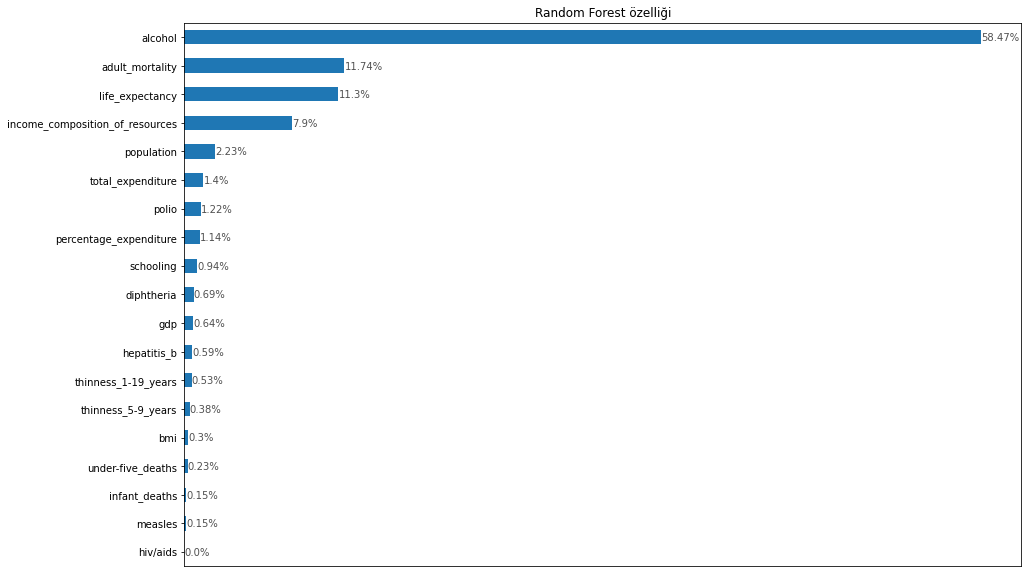

In [61]:
df = pd.DataFrame(dizi.iloc[:, 1:].columns, columns = ['feature'])
df['fscore'] = random_forest_model.feature_importances_[:, ]

#İlk 10 özelliği göreceli inceliyoruz.
df['fscore'] = df['fscore'] / df['fscore'].max()
df.sort_values('fscore', ascending = False, inplace = True)
df = df[0:19]
df.sort_values('fscore', ascending = True, inplace = True)
ax = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(15, 10))

# Plot the result.
plt.title('Random Forest özelliği')
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks()

#Verileri toplamak için liste oluşturuyoruz.
toplamlar = []

for i in ax.patches:
    toplamlar.append(i.get_width())

# Set individual bar lables using above list.
toplam = sum(toplamlar)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down.
    ax.text(i.get_width(), i.get_y()+.13, \
            str(round((i.get_width()/toplam)*100, 2))+'%', fontsize=10,
color='#505050')
    
plt.show()

In [62]:
random_forest_score = random_forest_model.predict(ozellikler_test)

print("Eğitim verisindeki puan: %.2f" % random_forest_model.score(ozellikler_egitim, etiketler_egitim))
print("Test verisindeki puan: %.2f" % random_forest_model.score(ozellikler_test, etiketler_test))

Eğitim verisindeki puan: 0.91
Test verisindeki puan: 0.66
